### Find Most in-Demand Skills for Top 3 Most Popular Data Roles

Method:
1. Clean skill column
2. Calculate skill count based on `job_title_short`
3. Calculate skill percentage
4. Plot final findings

In [1]:
# Import libraries
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv(r'../data/data_jobs.csv')

# Data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

### Plot Count of Data Analyst, Data Engineer, and Data Scientist Job Postings

In [106]:
# Filter for jobs in Australia
df_aus = df[df['job_country'] == 'Australia']
df_skills = df_aus.explode('job_skills')

# Count number of times skills appear for certain job titles
df_skills_count = df_skills.groupby(['job_title_short', 'job_skills']).size()
df_skills_count = df_skills_count.reset_index(name='skill_count')
df_skills_count = df_skills_count.sort_values(by='skill_count', ascending=False)

In [107]:
# Create list of job titles of interest
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']
job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

In [108]:
df_skills_count

,job_title_short,job_skills,skill_count
510,Data Engineer,sql,2914
484,Data Engineer,python,2388
385,Data Engineer,azure,1789
384,Data Engineer,aws,1752
505,Data Engineer,spark,1157
...,...,...,...
613,Data Scientist,neo4j,1
615,Data Scientist,no-sql,1
14,Business Analyst,chef,1
11,Business Analyst,c#,1


In [109]:
# Find total count of job postings by job title
df_job_title_count = df_aus['job_title_short'].value_counts().reset_index(name='jobs_total')

# Create merged dataframe with count of specific skill and total number of job postings for specific job title
df_skills_pct = pd.merge(df_skills_count, df_job_title_count, how='left', on='job_title_short')

# Calculate percent of job postings require a specific skill
df_skills_pct['skills_percent'] = (df_skills_pct['skill_count'] / df_skills_pct['jobs_total']) * 100
df_skills_pct


,job_title_short,job_skills,skill_count,jobs_total,skills_percent
0,Data Engineer,sql,2914,4658,62.559038
1,Data Engineer,python,2388,4658,51.266638
2,Data Engineer,azure,1789,4658,38.407042
3,Data Engineer,aws,1752,4658,37.612709
4,Data Engineer,spark,1157,4658,24.838987
...,...,...,...,...,...
1302,Data Scientist,neo4j,1,1179,0.084818
1303,Data Scientist,no-sql,1,1179,0.084818
1304,Business Analyst,chef,1,928,0.107759
1305,Business Analyst,c#,1,928,0.107759


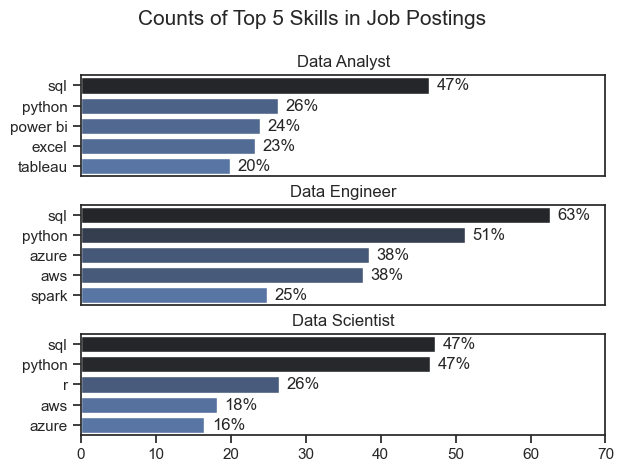

In [138]:
# Create 3 horizontal bar plots showing count of job postings per job title
sns.set_theme(style='ticks')
fig, ax = plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_pct[df_skills_pct['job_title_short'] == job_title].head(5)
    # df_plot.plot(kind='barh', ax=ax[i], x='job_skills', y='skills_percent', legend=False, title=job_title)
    sns.barplot(data=df_plot, x='skills_percent', y='job_skills', hue='skills_percent', ax=ax[i], palette='dark:b_r', legend=False)
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].set_xlim(0, 70)

    if i < len(job_titles) - 1:
        ax[i].set_xticks([])

    for n, v in enumerate(df_plot['skills_percent']):
        ax[i].text(v + 1, n, f'{v:.0f}%', va='center')

fig.suptitle('Counts of Top 5 Skills in Job Postings', fontsize=15)
plt.tight_layout(h_pad=0.5)
plt.show()